Nama : Mohammad Hikmal Maulana

NPM : 23083010053

Kelas : A

**Deskripsi Data**

Dataset ini berisi data tentang pertandingan Australian Football League (AFL) dengan berbagai informasi terkait setiap pertandingan. Setiap baris mewakili satu pertandingan, dan dataset mencakup detail pertandingan seperti game id, tahun, stadion, tanggal, suhu maksimum dan minimum, curah hujan, jumlah penonton, serta skor tim tuan rumah dan tim tamu




**METADATA**

* GameId : ID unik untuk setiap pertandingan. Ini digunakan untuk mengidentifikasi setiap pertandingan secara individual dalam dataset

* Year : Tahun di mana pertandingan tersebut dimainkan

* Round : Putaran (Round) dalam kompetisi tersebut. Setiap musim biasanya dibagi menjadi beberapa ronde, dan kolom ini menunjukkan di ronde ke berapa pertandingan ini berlangsung.

* Date : Tanggal pertandingan dilaksanakan

* MaxTemp : Suhu maksimum pada hari pertandingan

* MinTemp : Suhu minimum  pada hari pertandingan

* Rainfall : Curah hujan pada hari pertandingan

* Venue : Nama stadion atau tempat pertandingan berlangsung

* StartTime : Waktu mulai pertandingan, yang mencakup jam dan menit

* Attendance : Jumlah penonton yang hadir dalam pertandingan tersebut

* HomeTeam : Nama tim tuan rumah

* HomeTeamScoreQT : Skor tim tuan rumah pada akhir kuarter pertama

* HomeTeamScoreHT : Skor tim tuan rumah pada paruh waktu (half-time)

* HomeTeamScore3QT : Skor tim tuan rumah pada akhir kuarter ketiga

* HomeTeamScoreFT : Skor akhir tim tuan rumah pada akhir pertandingan

* HomeTeamScore : Total skor akhir dari tim tuan rumah

* AwayTeam : Nama tim tamu

* AwayTeamScoreQT : Skor tim tamu pada akhir kuarter pertama

* AwayTeamScoreHT : Skor tim tamu pada paruh waktu

* AwayTeamScore3QT : Skor tim tamu pada akhir kuarter ketiga

* AwayTeamScoreFT : Skor akhir tim tamu pada akhir pertandingan

* AwayTeamScore : Total skor akhir dari tim tamu



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive

In [3]:
# Mount Google Drive ke Colab
drive.mount('/content/drive')

# Path file Excel di Google Drive
file_path = '/content/drive/My Drive/Afl.xlsx'
# Membaca file Excel
data = pd.read_excel(file_path)
# Menampilkan data awal dan informasi kolom
display(data.head())
print(data.info())

Mounted at /content/drive


,GameId,Year,Round,Date,MaxTemp,MinTemp,Rainfall,Venue,StartTime,Attendance,...,HomeTeamScoreHT,HomeTeamScore3QT,HomeTeamScoreFT,HomeTeamScore,AwayTeam,AwayTeamScoreQT,AwayTeamScoreHT,AwayTeamScore3QT,AwayTeamScoreFT,AwayTeamScore
0,2012R0101,2012,R1,2012-03-24,24.0,12.2,0.0,Stadium Australia,7:20 PM,38.203,...,3.3,3.4,5.70,37,Sydney,4.1,8.4,13.80,14.16,100
1,2012R0102,2012,R1,2012-03-29,25.7,9.7,0.0,M.C.G.,7:45 PM,78.285,...,5.6,10.7,12.90,81,Carlton,3.2,8.7,11.13,18.17,125
2,2012R0103,2012,R1,2012-03-30,27.4,9.7,0.0,M.C.G.,7:50 PM,78.466,...,10.6,14.1,20.17,137,Collingwood,2.7,7.9,12.16,16.19,115
3,2012R0104,2012,R1,2012-03-31,29.1,15.1,0.6,M.C.G.,1:45 PM,33.473,...,7.4,8.8,11.12,78,Brisbane Lions,1.4,7.8,13.13,17.17,119
4,2012R0105,2012,R1,2012-03-31,28.2,19.7,0.0,Carrara,3:45 PM,12.790,...,5.3,8.6,10.80,68,Adelaide,7.8,11.1,15.16,19.23,137


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2447 entries, 0 to 2446
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GameId            2447 non-null   object 
 1   Year              2447 non-null   int64  
 2   Round             2447 non-null   object 
 3   Date              2447 non-null   object 
 4   MaxTemp           2440 non-null   float64
 5   MinTemp           2440 non-null   float64
 6   Rainfall          2425 non-null   float64
 7   Venue             2447 non-null   object 
 8   StartTime         2447 non-null   object 
 9   Attendance        2447 non-null   float64
 10  HomeTeam          2447 non-null   object 
 11  HomeTeamScoreQT   2447 non-null   float64
 12  HomeTeamScoreHT   2447 non-null   float64
 13  HomeTeamScore3QT  2447 non-null   float64
 14  HomeTeamScoreFT   2447 non-null   float64
 15  HomeTeamScore     2447 non-null   int64  
 16  AwayTeam          2447 non-null   object 


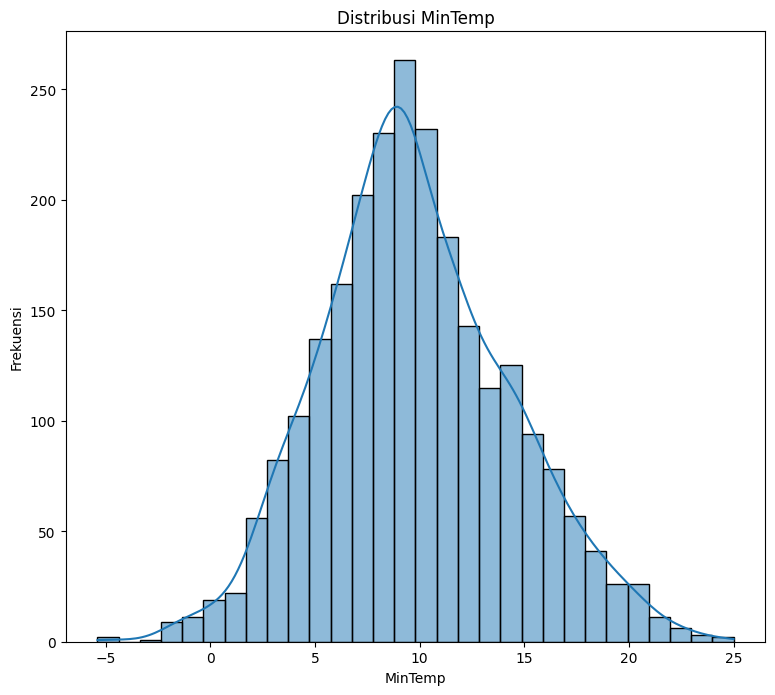


Data tersebut termasuk Distribusi Skewed Positive
Alasan : Distribusi suhu minimum cenderung miring ke kanan (skewed positif). Hal ini menunjukkan bahwa sebagian besar hari memiliki suhu minimum yang lebih tinggi, dengan beberapa hari yang sangat dingin (suhu minimum sangat rendah)
Ekor distribusi yang memanjang ke arah suhu minimum yang lebih rendah mengindikasikan adanya nilai ekstrem pada suhu rendah.


In [85]:
# MinTemp
plt.figure(figsize=(15, 20))
plt.subplot(3, 2, 1)
sns.histplot(data['MinTemp'], kde=True, bins=30)
plt.title('Distribusi MinTemp')
plt.xlabel('MinTemp')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()
print("\nData tersebut termasuk Distribusi Skewed Positive\nAlasan : Distribusi suhu minimum cenderung miring ke kanan (skewed positif). Hal ini menunjukkan bahwa sebagian besar hari memiliki suhu minimum yang lebih tinggi, dengan beberapa hari yang sangat dingin (suhu minimum sangat rendah)\nEkor distribusi yang memanjang ke arah suhu minimum yang lebih rendah mengindikasikan adanya nilai ekstrem pada suhu rendah.")

In [55]:
# MinTemp Analysis
min_temp = data['MinTemp']

# Menghitung pemusatan dan penyebaran data
min_temp_mean = min_temp.mean()
min_temp_median = min_temp.median()
min_temp_mode = min_temp.mode()[0]
min_temp_range = min_temp.max() - min_temp.min()
min_temp_std = min_temp.std()
min_temp_q1 = min_temp.quantile(0.25)
min_temp_q3 = min_temp.quantile(0.75)
min_temp_iqr = min_temp_q3 - min_temp_q1
min_temp_variance = min_temp.var()
min_temp_skewness = min_temp.skew()

# Menampilkan hasil
print(f"Pemusatan dan Penyebaran Data untuk MinTemp:")
print(f"Mean: {min_temp_mean:.2f}")
print(f"Median: {min_temp_median:.2f}")
print(f"Mode: {min_temp_mode:.2f}")
print(f"Range: {min_temp_range:.2f}")
print(f"Standar Deviasi: {min_temp_std:.2f}")
print(f"Q1: {min_temp_q1:.2f}")
print(f"Q3: {min_temp_q3:.2f}")
print(f"IQR: {min_temp_iqr:.2f}")
print(f"Varians: {min_temp_variance:.2f}")
print(f"Skewness: {min_temp_skewness:.2f}")

# Analisis Skewness
print("\nAnalisis Skewness:")
if min_temp_skewness > 0:
    print("Data ini termasuk ke dalam distribusi skewed positive.")
    print("Alasan: Ekor distribusi berada di sisi kanan, menunjukkan bahwa "
          "mayoritas suhu minimum cenderung lebih rendah, namun ada beberapa nilai ekstrem yang lebih tinggi.")
elif min_temp_skewness < 0:
    print("Data ini termasuk ke dalam distribusi skewed negative.")
    print("Alasan: Ekor distribusi berada di sisi kiri, menunjukkan bahwa "
          "mayoritas suhu minimum cenderung lebih tinggi, dengan beberapa nilai ekstrem yang lebih rendah.")
else:
    print("Data ini terdistribusi normal.")

Pemusatan dan Penyebaran Data untuk HomeTeamScore:
Mean: 87.34
Median: 85.00
Mode: 80.00
Range: 189.00
Standar Deviasi: 27.12
Q1: 68.00
Q3: 105.00
IQR: 37.00
Varians: 735.38
Skewness: 0.40

Analisis Skewness:
Data ini termasuk ke dalam distribusi skewed positive.
Alasan: Ekor distribusi berada di sisi kanan, menunjukkan bahwa mayoritas skor tim tuan rumah cenderung lebih rendah, namun ada beberapa nilai ekstrem yang lebih tinggi.


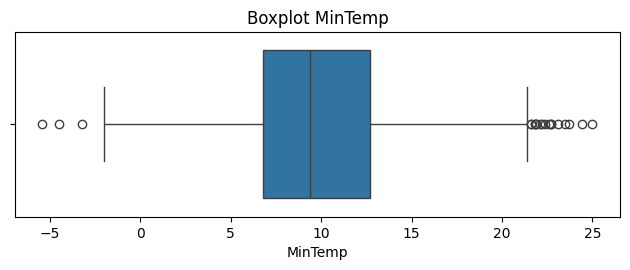


Boxplot menunjukkan ekor distribusi ke kanan. Mayoritas data terkonsentrasi di sisi kiri, dengan outlier di sisi kanan, menandakan distribusi skewed positive.


In [68]:
# Visualisasi Boxplot
plt.subplot(2, 1, 2)  # Mengatur layout untuk boxplot
sns.boxplot(x=data['MinTemp'])
plt.title('Boxplot MinTemp')
plt.xlabel('MinTemp')
plt.tight_layout()
plt.show()
print("\nBoxplot menunjukkan ekor distribusi ke kanan. "
      "Mayoritas data terkonsentrasi di sisi kiri, "
      "dengan outlier di sisi kanan, menandakan distribusi skewed positive.")

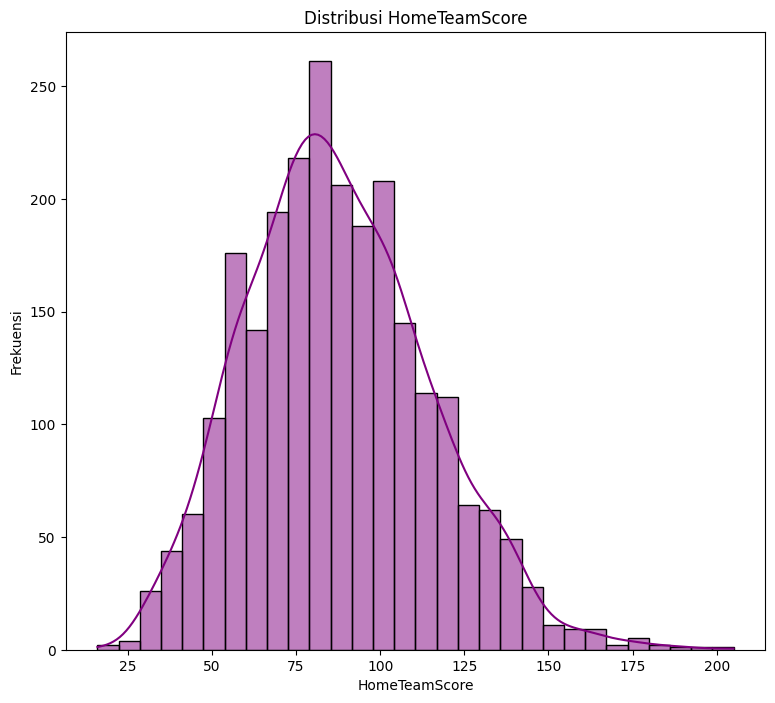


Data tersebut termasuk Distribusi Skewed Positive
Alasan: Sebagian besar pertandingan memiliki skor yang berkisar di sekitar nilai rendah, namun ada beberapa pertandingan di mana salah satu tim mencetak skor yang sangat tinggi, menyebabkan distribusi miring ke kanan.


In [33]:
# HomeTeamScore
plt.figure(figsize=(15, 20))
plt.subplot(3, 2, 4)
sns.histplot(data['HomeTeamScore'], kde=True, bins=30, color='purple')
plt.title('Distribusi HomeTeamScore')
plt.xlabel('HomeTeamScore')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()
print("\nData tersebut termasuk Distribusi Skewed Positive\nAlasan: Sebagian besar pertandingan memiliki skor yang berkisar di sekitar nilai rendah, "
      "namun ada beberapa pertandingan di mana salah satu tim mencetak skor yang sangat tinggi, menyebabkan distribusi miring ke kanan.")

In [56]:
# HomeTeamScore Analysis
home_team_score = data['HomeTeamScore']

# Menghitung pemusatan dan penyebaran data
home_team_score_mean = home_team_score.mean()
home_team_score_median = home_team_score.median()
home_team_score_mode = home_team_score.mode()[0]
home_team_score_range = home_team_score.max() - home_team_score.min()
home_team_score_std = home_team_score.std()
home_team_score_q1 = home_team_score.quantile(0.25)
home_team_score_q3 = home_team_score.quantile(0.75)
home_team_score_iqr = home_team_score_q3 - home_team_score_q1
home_team_score_variance = home_team_score.var()
home_team_score_skewness = home_team_score.skew()

# Menampilkan hasil
print(f"Pemusatan dan Penyebaran Data untuk HomeTeamScore:")
print(f"Mean: {home_team_score_mean:.2f}")
print(f"Median: {home_team_score_median:.2f}")
print(f"Mode: {home_team_score_mode:.2f}")
print(f"Range: {home_team_score_range:.2f}")
print(f"Standar Deviasi: {home_team_score_std:.2f}")
print(f"Q1: {home_team_score_q1:.2f}")
print(f"Q3: {home_team_score_q3:.2f}")
print(f"IQR: {home_team_score_iqr:.2f}")
print(f"Varians: {home_team_score_variance:.2f}")
print(f"Skewness: {home_team_score_skewness:.2f}")

# Analisis Skewness
print("\nAnalisis Skewness:")
if home_team_score_skewness > 0:
    print("Data ini termasuk ke dalam distribusi skewed positive.")
    print("Alasan: Ekor distribusi berada di sisi kanan, menunjukkan bahwa "
          "mayoritas skor tim tuan rumah cenderung lebih rendah, namun ada beberapa nilai ekstrem yang lebih tinggi.")
elif home_team_score_skewness < 0:
    print("Data ini termasuk ke dalam distribusi skewed negative.")
    print("Alasan: Ekor distribusi berada di sisi kiri, menunjukkan bahwa "
          "mayoritas skor tim tuan rumah cenderung lebih tinggi, dengan beberapa nilai ekstrem yang lebih rendah.")
else:
    print("Data ini terdistribusi normal.")


Pemusatan dan Penyebaran Data untuk HomeTeamScore:
Mean: 87.34
Median: 85.00
Mode: 80.00
Range: 189.00
Standar Deviasi: 27.12
Q1: 68.00
Q3: 105.00
IQR: 37.00
Varians: 735.38
Skewness: 0.40

Analisis Skewness:
Data ini termasuk ke dalam distribusi skewed positive.
Alasan: Ekor distribusi berada di sisi kanan, menunjukkan bahwa mayoritas skor tim tuan rumah cenderung lebih rendah, namun ada beberapa nilai ekstrem yang lebih tinggi.


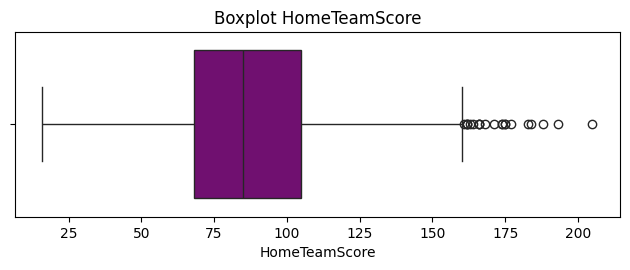


Boxplot memperlihatkan ekor distribusi yang lebih panjang di sisi kanan. Sebagian besar data terakumulasi di sisi kiri, sementara terdapat beberapa nilai ekstrem di sisi kanan, 
yang menunjukkan bahwa distribusi ini bersifat skewed positive.


In [70]:
plt.subplot(2, 1, 2)  # Mengatur layout untuk boxplot
sns.boxplot(x=data['HomeTeamScore'], color='purple')
plt.title('Boxplot HomeTeamScore')
plt.xlabel('HomeTeamScore')
plt.tight_layout()
plt.show()

print("\nBoxplot memperlihatkan ekor distribusi yang lebih panjang di sisi kanan. "
      "Sebagian besar data terakumulasi di sisi kiri, "
      "sementara terdapat beberapa nilai ekstrem di sisi kanan, "
      "\nyang menunjukkan bahwa distribusi ini bersifat skewed positive.")


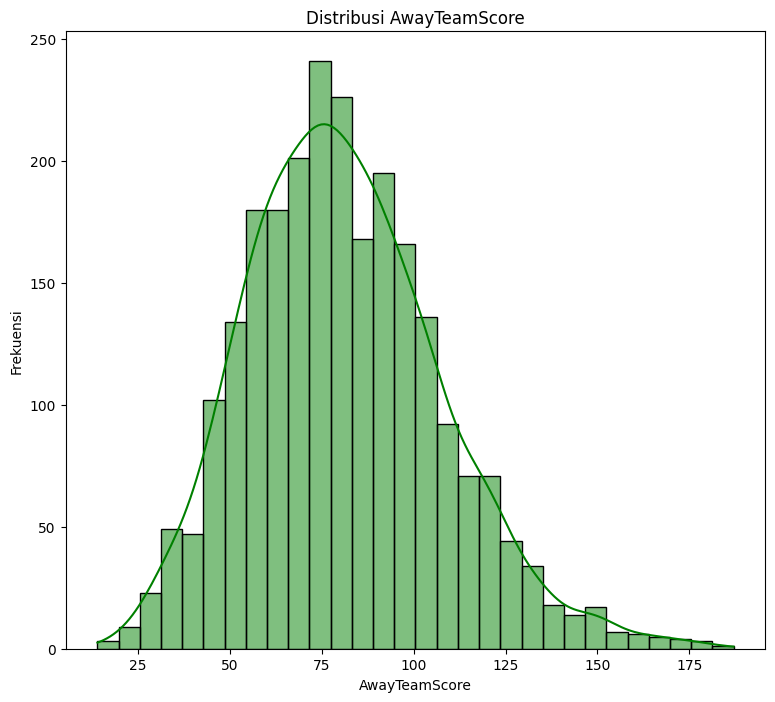


Boxplot ini menunjukkan bahwa distribusi memiliki ekor yang lebih panjang ke arah kanan. Kebanyakan nilai terdistribusi di bagian kiri, sementara terdapat sejumlah kecil nilai tinggi yang menjadi outlier, menunjukkan karakteristik skewed positive pada distribusi ini.


In [79]:
# AwayTeamScore
plt.figure(figsize=(15, 20))
plt.subplot(3, 2, 5)
sns.histplot(data['AwayTeamScore'], kde=True, bins=30, color='green')
plt.title('Distribusi AwayTeamScore')
plt.xlabel('AwayTeamScore')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()
print("\nBerdasarkan histogram tersebut data ini termasuk distribusi Skewed Positive\nAlasan: Sebagian besar pertandingan memiliki skor yang berkisar di sekitar nilai rendah, "
      "tetapi ada beberapa skor tinggi yang jarang terjadi, yang menyebabkan distribusi ini miring ke kanan.")

In [62]:
# AwayTeamScore Analysis
away_team_score = data['AwayTeamScore']

# Menghitung pemusatan dan penyebaran data
away_team_score_mean = away_team_score.mean()
away_team_score_median = away_team_score.median()
away_team_score_mode = away_team_score.mode()[0]
away_team_score_range = away_team_score.max() - away_team_score.min()
away_team_score_std = away_team_score.std()
away_team_score_q1 = away_team_score.quantile(0.25)
away_team_score_q3 = away_team_score.quantile(0.75)
away_team_score_iqr = away_team_score_q3 - away_team_score_q1
away_team_score_variance = away_team_score.var()
away_team_score_skewness = away_team_score.skew()

# Menampilkan hasil
print(f"\nPemusatan dan Penyebaran Data untuk AwayTeamScore:")
print(f"Mean: {away_team_score_mean:.2f}")
print(f"Median: {away_team_score_median:.2f}")
print(f"Mode: {away_team_score_mode:.2f}")
print(f"Range: {away_team_score_range:.2f}")
print(f"Standar Deviasi: {away_team_score_std:.2f}")
print(f"Q1: {away_team_score_q1:.2f}")
print(f"Q3: {away_team_score_q3:.2f}")
print(f"IQR: {away_team_score_iqr:.2f}")
print(f"Varians: {away_team_score_variance:.2f}")
print(f"Skewness: {away_team_score_skewness:.2f}")

# Analisis Skewness
print("\nAnalisis Skewness:")
if away_team_score_skewness > 0:
    print("Data ini termasuk ke dalam distribusi skewed positive.")
    print("Alasan: Ekor distribusi terletak di sisi kanan, menunjukkan bahwa "
          "mayoritas skor tim tandang lebih rendah, tetapi terdapat beberapa nilai ekstrem yang lebih tinggi.")
elif away_team_score_skewness < 0:
    print("Data ini termasuk ke dalam distribusi skewed negative.")
    print("Alasan: Ekor distribusi terletak di sisi kiri, menunjukkan bahwa "
          "mayoritas skor tim tandang lebih tinggi, dengan beberapa nilai ekstrem yang lebih rendah.")
else:
    print("Data ini terdistribusi normal.")


Pemusatan dan Penyebaran Data untuk AwayTeamScore:
Mean: 81.06
Median: 79.00
Mode: 72.00
Range: 173.00
Standar Deviasi: 26.39
Q1: 62.00
Q3: 97.00
IQR: 35.00
Varians: 696.44
Skewness: 0.51

Analisis Skewness:
Data ini termasuk ke dalam distribusi skewed positive.
Alasan: Ekor distribusi terletak di sisi kanan, menunjukkan bahwa mayoritas skor tim tandang lebih rendah, tetapi terdapat beberapa nilai ekstrem yang lebih tinggi.


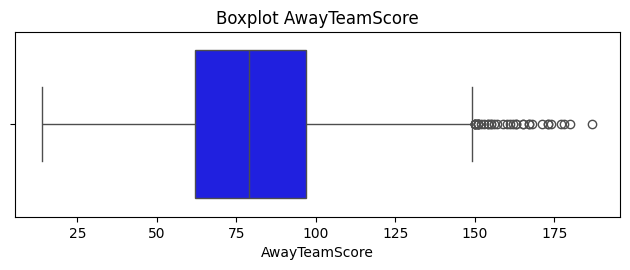


Boxplot ini menunjukkan bahwa distribusi memiliki ekor yang lebih panjang ke arah kanan. Kebanyakan nilai terdistribusi di bagian kiri, sementara terdapat sejumlah kecil 
nilai tinggi yang menjadi outlier, menunjukkan karakteristik skewed positive pada distribusi ini.


In [83]:
# Boxplot untuk AwayTeamScore
plt.subplot(2, 1, 2)  # Mengatur layout untuk boxplot
sns.boxplot(x=data['AwayTeamScore'], color='blue')
plt.title('Boxplot AwayTeamScore')
plt.xlabel('AwayTeamScore')
plt.tight_layout()
plt.show()

print("\nBoxplot ini menunjukkan bahwa distribusi memiliki ekor yang lebih panjang ke arah kanan. "
      "Kebanyakan nilai terdistribusi di bagian kiri, sementara terdapat sejumlah kecil "
      "\nnilai tinggi yang menjadi outlier, menunjukkan karakteristik skewed positive pada distribusi ini.")
